In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Physical constants
S_0 = 1360  # Solar constant [W/m^2]
lambda_0 = 0.5e-6  # Solar wavelength under consideration [m]
mu = 0.5  # Cosine of the solar zenith angle
Omega_star = 6.87e-5  # Solid angle of the sky occupied by the sun, stolen from
                      # https://en.wikipedia.org/wiki/Solid_angle#Sun_and_Moon (no citation)

In [32]:
def I_star(tau_0):
    """ Direct beam intensity at the surface. """
    return S_0 * np.exp(-tau_0/mu) / Omega_star

In [33]:
def I_minus(tau_0, g_hat):
    """ Downwards diffuse intensity at the surface assuming
    conservative scattering and a perfectly absorbing ground
    in the hemi-isotropic approximation. """
    mult_factor = mu * S_0 / (np.pi * (1 + (1-g_hat)*tau_0))
    term1 = (0.5 + mu) * (1 - np.exp(-tau_0/mu))
    term2 = (1-g_hat) * tau_0 * np.exp(-tau_0/mu)
    return mult_factor * (term1 - term2)

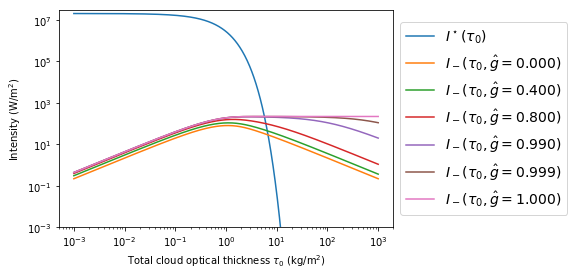

In [71]:
# Problem 2(c)
g_hat_values = [0, 0.4, 0.8, 0.99, 0.999, 1]
tau_0_values = np.logspace(-3, 3, 1000)

I_star_values = I_star(tau_0_values)
plt.loglog(tau_0_values, I_star_values, label=r'$I^\star(\tau_0)$')

for g_hat in g_hat_values:
    I_minus_values = I_minus(tau_0_values, g_hat)
    plt.loglog(tau_0_values, I_minus_values, label=r'$I_-(\tau_0, \hat{{g}}={:.3f})$'.format(g_hat))

plt.ylim([1e-3, 3e7])
plt.xlabel(r'Total cloud optical thickness $\tau_0$ (kg/m$^2$)')
plt.ylabel('Intensity (W/m$^2$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.show()